<a href="https://colab.research.google.com/github/pythience/Integrador/blob/master/TPFinal_AUSA_Dummies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Science 2019 - Digital House #Data
##Trabajo Integrador
![](https://www.ausa.com.ar/wp-content/themes/ausa/images/logo-ausa-negro.png)
##Seguridad Vial Autopistas Ausa 
###Introducción
####Información de hechos que requirieron atención por parte de Seguridad de Vial de AUSA.

El dataset consiste en vectores de características que pertenecen a 5700+ incidentes o hechos que requirieron atención por parte de Seguridad de Vial de AUSA. 

El conjunto de datos se conforma de manera que cada registro pertenezca a un hecho diferente. Cada hecho se registra con fecha y hora, vía dónde ocurre, condiciones climáticas y vehículos involucrados.

El conjunto de datos original consta de 1 atributo de fechas, 8 atributos numéricos y 6 atributos categóricos. El atributo 'lesionados' o 'fallecidos' se utiliza como etiqueta de clasificación.

####Descripción de las columnas:
**Fecha:** Fecha del hecho.

**Autopista:** En cuál de las autopistas que administra AUSA se produjo el hecho. (También se informan zonas importantes como el distribuidor de 9 de julio y la zona de transición entre la AU1 y las AU6).
**Localización:** Detalle que da más precisión del lugar donde se produjo el hecho dentro de la autopista.
**Punto Kilométrico:** Lugar del hecho contado desde el kilometro 0 de cada autopista.

**Tipo Evento:** Categorización del hecho:
*   **Accidente:** acontecimiento inesperado, no planeado, que implica una alteración en el estado normal de las personas, elementos o funciones, con repercusiones negativas,con potencial para causar lesiones o muerte en las personas y daños o perjuicios a bienes de los actores involucrados o de terceros.
*   **Incidente:** materialización de un riesgo en un suceso concreto de escasa o nula
repercusión dañina, que puede ocasionar una reducción temporaria de la calzada o un
incremento anormal de la demanda, que afecta la seguridad vial y que puede
desencadenar en un accidente.

**Tipo de siniestro:** son descripciones acotadas o categorizadas del hecho de tránsito.

**Tipos de Vehículos:** es la clasificación por tipología de vehículos involucrados.
*   Camiones (incluye FURGON GRANDE, GRUAS).
*   Autos (incluye: TAXI, PIC UP, CAMIONETA, FURGON CHICO).
*   Motos
*   Ómnibus (Incluye: AUTOBUS y MINIBUS).

**Clima:** Estado del Clima en el momento del hecho (seleccionado manualmente).

**Estado Pavimento:** Estado del pavimento en el momento del hecho (seleccionado
manualmente).

**Fallecidos y Heridos:** Numero de involucrados en los accidentes según su estado de gravedad.



---


###  Series de tiempo

El análisis de series de tiempo se suele utilizar para proyectar o pronosticar la evolución de una variable a lo largo del tiempo, a partir de información previa sobre esa misma variable. 

#### 1) Análisis exploratorio y preprocessing

El dataset nos provee:
*   tres columnas sobre la ubicación donde se produce el incidente. 
*   tres columnas relacionadas a la fecha del incidente. (donde detectamos una inconsistencia de origen en el formato de la fecha, y para lo cual el dataset incluye una columna adicional que permite corregirlo).
*   dos columnas sobre las condiciones ambientales al momento del incidente.
*   cinco columnas sobre el tipo de incidente y los vehículos involucrados.
*   dos columnas sobre el estado y cantidad de personas involucradas.


*Otras características:*
La función "Día especial" indica la proximidad del tiempo de visita del sitio a un día especial específico (por ejemplo, el Día de la Madre, el Día de San Valentín) en el que es más probable que las sesiones finalicen con la compra. El valor de este atributo se determina considerando la dinámica del comercio electrónico, como la duración entre la fecha del pedido y la fecha de entrega. Por ejemplo, para el día de San Valentín, este valor toma un valor distinto de cero entre el 2 de febrero y el 12 de febrero, cero antes y después de esta fecha a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero. El conjunto de datos también incluye sistema operativo, navegador, región, tipo de tráfico, tipo de visitante como visitante recurrente o nuevo, un valor booleano que indica si la fecha de la visita es el fin de semana y el mes del año.

*Fuente: https://data.buenosaires.gob.ar/dataset/seguridad-vial-autopistas-ausa/archivo/187.2*


---



#ANÁLISIS EXPLICATIVO

In [0]:
# para Colab, excluir para Anaconda
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# para Anaconda:
path = ''

# para Colab, CB:
path = 'gdrive/My Drive/DataScience - DH/Trabajo_Integrador/AUSA/BA DATA/'

In [0]:
# Importamos las librerías necesarias
# https://data.buenosaires.gob.ar/dataset/seguridad-vial-autopistas-ausa/archivo/187.2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline
pd.options.display.max_rows = 100
pd.set_option("display.max_rows", 101)
from datetime import datetime, date, time, timedelta
import calendar

In [0]:
# Levantamos el dataset
# df = pd.read_csv("intervenciones-de-seguridad-vial.csv", encoding = 'utf-8')
df = pd.read_csv('{}intervenciones-de-seguridad-vial.csv'.format(path), dtype={'periodo':'str', 'fecha':'str'}, encoding = 'utf-8')  

df.shape

(5785, 15)

In [0]:
#import pickle
#with open('{}intervenciones-de-seguridad-vial.pkl'.format(path), 'rb') as f_df:
#    df = pickle.load(f_df)
#    
#df.shape

In [0]:
df.sample(5)

,periodo,fecha,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion
4941,201805,2018-05-21,9,AU FRONDIZI,ASCENDENTE,3500,BUENO,SECA,1,0,COLISION CON OBSTACULO FIJO,0,0,0,1
376,201405,2014-05-18,6,AU 25 DE MAYO,DESCENDENTE,2500,BUENO,SECA,0,0,COLISION CON OBSTACULO FIJO,0,1,0,0
3213,201610,2016-10-21,2,AV LUGONES,DESCENDENTE,5000,BUENO,MOJADA/HUMEDA,0,0,SINIESTRO DE UN SOLO VEHICULO / SIN COLISION,0,1,0,0
3904,201706,2017-06-06,11,AV LUGONES,DESCENDENTE,8500,BUENO,SECA,1,0,OBSTACULO NO FIJO,1,0,0,0
1077,201412,2014-12-12,9,AU 25 DE MAYO,DESCENDENTE,4700,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,1,0,1


###Se observan fechas en formato incorrecto, inconveniente de origen, y al dataset le agregaron un campo adicional para poder corregirlo.

In [0]:
print(df.periodo.unique())

['201401' '201402' '201403' '201404' '201405' '201406' '201407' '201408'
 '201409' '201410' '201411' '201412' '201501' '201502' '201503' '201504'
 '201505' '201506' '201507' '201508' '201509' '201510' '201511' '201512'
 '201601' '201602' '201603' '201604' '201605' '201606' '201607' '201608'
 '201609' '201610' '201611' '201612' '201701' '201702' '201703' '201704'
 '201705' '201706' '201707' '201708' '201709' '201710' '201711' '201712'
 '201801' '201802' '201803' '201804' '201805' '201806' '201807' '201808'
 '201809' '201810' '201811' '201812' '201901' '201902' '201903' '201904']


In [0]:
from datetime import datetime

def formatear_fecha(str_periodo, str_fecha, hora):
  periodo_mes = str_periodo[-2:]
  comps_fecha = str_fecha.split('-') #split por guión

  if (periodo_mes == comps_fecha[1]):
    return datetime(year=int(comps_fecha[0]), month=int(comps_fecha[1]), day=int(comps_fecha[2]), hour=hora)
  else:
    return datetime(year=int(comps_fecha[0]), month=int(comps_fecha[2]), day=int(comps_fecha[1]), hour=hora)
    


In [0]:
print(formatear_fecha('201802','2018-02-02',7))
print(formatear_fecha('201802','2018-02-27',7))
print(formatear_fecha('201802','2018-20-02',7))

2018-02-02 07:00:00
2018-02-27 07:00:00
2018-02-20 07:00:00


In [0]:
df['fecha_hora'] = df.apply(lambda row: formatear_fecha(row['periodo'], row['fecha'], row['hora']), axis=1)
#df['dia_semana'] = df.apply(lambda row: row['fecha_hora'].weekday(), axis=1) # days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
df['dia_semana']= df['fecha_hora'].dt.day_name()

In [0]:
df.sample(5)

,periodo,fecha,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion,fecha_hora,dia_semana
5624,201902,2019-02-26,10,AU PERITO MORENO,ASCENDENTE,4200,BUENO,SECA,2,0,SINIESTRO DE UN SOLO VEHICULO / SIN COLISION,1,0,0,0,2019-02-26 10:00:00,Tuesday
918,201411,2014-02-11,7,AU 25 DE MAYO,ASCENDENTE,1500,LLUVIOSO,MOJADA/HUMEDA,0,0,COLISION CON OBSTACULO FIJO,0,1,0,0,2014-11-02 07:00:00,Sunday
3231,201610,2016-10-27,15,AU DELLEPIANE,ASCENDENTE,3900,BUENO,SECA,2,0,COLISION CON DOS O MAS VEHICULOS,2,0,0,0,2016-10-27 15:00:00,Thursday
1962,201509,2015-09-16,19,AU ILLIA,ASCENDENTE,2300,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0,2015-09-16 19:00:00,Wednesday
272,201404,2014-12-04,21,AU PERTIO MORENO,ASCENDENTE,1400,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0,2014-04-12 21:00:00,Saturday


###Podemos transformar las columnas que intencionalmente cargamos como textos  al tipo más apropiado para transformar.

In [0]:
# reemplazamos los espacios por _ en nombres de columnas
df.columns = [x.replace(' ', '_') for x in df.columns]

In [0]:
df_cols = df.columns
print(df_cols)
df_cols_reord = ['periodo', 'fecha_hora', 'dia_semana', 'hora', 'autopista', 'banda_y_o_ramal', 'pk',
       'condiciones_meteorologicas', 'superficie_de_la_via', 'lesionados',
       'fallecidos', 'tipo_de_siniestro', 'moto', 'liviano', 'bus', 'camion', 'fecha']
#df.reindex(columns=df_cols_reord)
df = df[df_cols_reord]
df.sample(5)

Index(['periodo', 'fecha', 'hora', 'autopista', 'banda_y_o_ramal', 'pk',
       'condiciones_meteorologicas', 'superficie_de_la_via', 'lesionados',
       'fallecidos', 'tipo_de_siniestro', 'moto', 'liviano', 'bus', 'camion',
       'fecha_hora', 'dia_semana'],
      dtype='object')


,periodo,fecha_hora,dia_semana,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion,fecha
3309,201611,2016-11-16 16:00:00,Wednesday,16,AV CANTILO,ASCENDENTE,8500,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,1,0,0,2016-11-16
2050,201510,2015-10-09 18:00:00,Friday,18,AU 25 DE MAYO,DESCENDENTE,4600,BUENO,SECA,1,0,COLISION CON DOS O MAS VEHICULOS,1,1,0,0,2015-09-10
454,201406,2014-06-08 15:00:00,Sunday,15,AU 25 DE MAYO,DESCENDENTE,3200,BUENO,SECA,1,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0,2014-08-06
3300,201611,2016-11-14 18:00:00,Monday,18,AU PERTIO MORENO,DESCENDENTE,5500,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,1,1,0,2016-11-14
3967,201707,2017-07-03 12:00:00,Monday,12,AU PERTIO MORENO,DESCENDENTE,4900,BUENO,SECA,0,0,OBSTACULO NO FIJO,0,2,0,0,2017-03-07


In [0]:
periodo_types = df.periodo.unique()
df.periodo = pd.Categorical(df.periodo, categories=periodo_types, ordered=True)
print(df.periodo.cat.categories)

Index(['201401', '201402', '201403', '201404', '201405', '201406', '201407',
       '201408', '201409', '201410', '201411', '201412', '201501', '201502',
       '201503', '201504', '201505', '201506', '201507', '201508', '201509',
       '201510', '201511', '201512', '201601', '201602', '201603', '201604',
       '201605', '201606', '201607', '201608', '201609', '201610', '201611',
       '201612', '201701', '201702', '201703', '201704', '201705', '201706',
       '201707', '201708', '201709', '201710', '201711', '201712', '201801',
       '201802', '201803', '201804', '201805', '201806', '201807', '201808',
       '201809', '201810', '201811', '201812', '201901', '201902', '201903',
       '201904'],
      dtype='object')


In [0]:
dia_semana_types = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
print(dia_semana_types)
df.dia_semana = pd.Categorical(df.dia_semana, categories=dia_semana_types, ordered=True)
print(df.dia_semana.cat.categories)

['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'],
      dtype='object')


In [0]:
df.hora = pd.Categorical(df.hora, ordered=True)
print(df.hora.cat.categories)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64')


In [0]:
print (df.dtypes)


periodo                             category
fecha_hora                    datetime64[ns]
dia_semana                          category
hora                                category
autopista                             object
banda_y_o_ramal                       object
pk                                    object
condiciones_meteorologicas            object
superficie_de_la_via                  object
lesionados                             int64
fallecidos                             int64
tipo_de_siniestro                     object
moto                                   int64
liviano                                int64
bus                                    int64
camion                                 int64
fecha                                 object
dtype: object


In [0]:
# Chequeamos nulos y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5785 entries, 0 to 5784
Data columns (total 17 columns):
periodo                       5785 non-null category
fecha_hora                    5785 non-null datetime64[ns]
dia_semana                    5785 non-null category
hora                          5785 non-null category
autopista                     5785 non-null object
banda_y_o_ramal               5785 non-null object
pk                            5785 non-null object
condiciones_meteorologicas    5785 non-null object
superficie_de_la_via          5785 non-null object
lesionados                    5785 non-null int64
fallecidos                    5785 non-null int64
tipo_de_siniestro             5785 non-null object
moto                          5785 non-null int64
liviano                       5785 non-null int64
bus                           5785 non-null int64
camion                        5785 non-null int64
fecha                         5785 non-null object
dtypes: category(3

In [0]:
df.describe()

,lesionados,fallecidos,moto,liviano,bus,camion
count,5785.000000,5785.000000,5785.000000,5785.00000,5785.000000,5785.000000
mean,0.616768,0.008124,0.378047,1.21331,0.038029,0.146932
std,0.977918,0.091682,0.530242,0.99156,0.202693,0.410172
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,2.00000,0.000000,0.000000
max,17.000000,2.000000,3.000000,9.00000,2.000000,3.000000


In [0]:
# Revisamos los lesionados por autopista
#df2=df[['autopista','lesionados']].groupby(['autopista']).aggregate([np.sum])
df2=df[['autopista','lesionados']].groupby(['autopista']).sum().sort_values('lesionados', ascending=False)
df2

,lesionados
autopista,
AU 25 DE MAYO,1287
AU DELLEPIANE,586
AU PERTIO MORENO,542
AU FRONDIZI,405
AV LUGONES,231
AU ILLIA,177
AV CANTILO,132
AU PERITO MORENO,81
AV. LUGONES,50


In [0]:
# Chequeamos totales
total_ori=np.sum(df.lesionados)
total=np.sum(df2.lesionados)
print("Total lesionados datos originales: %d" % total_ori)
print("Total lesionados por autopista: %d" % total)

Total lesionados datos originales: 3568
Total lesionados por autopista: 3568


In [0]:
# Revisamos los lesionados por periodo
df3=df[['periodo','lesionados']].groupby(['periodo']).sum().sort_values('lesionados', ascending=False).head(10)
df3

,lesionados
periodo,
201412,97
201712,93
201510,86
201512,79
201612,78
201704,77
201503,74
201508,72
201505,70


In [0]:
# Revisamos los lesionados por meses del año.
df6=df[['fecha_hora','lesionados']].groupby(df.fecha_hora.dt.month).sum().sort_values('lesionados', ascending=False)
df6

,lesionados
fecha_hora,
12,384
4,350
3,325
5,315
10,302
8,294
1,291
2,279
11,279


In [0]:
# Revisamos los lesionados por día de la semana
df4=df[['dia_semana','lesionados']].groupby(['dia_semana']).sum().sort_values('lesionados', ascending=False)
df4

,lesionados
dia_semana,
Friday,597
Wednesday,568
Thursday,555
Sunday,504
Tuesday,502
Monday,472
Saturday,370


In [0]:
# Revisamos los lesionados por hora
display(df[['hora', 'lesionados']].groupby(['hora']).sum().sort_values('lesionados', ascending=False).head(10))


,lesionados
hora,
9,275
18,270
17,230
8,229
10,217
7,215
13,189
15,182
14,177


In [0]:
# Revisamos los lesionados por día y hora
df5=df[['dia_semana', 'hora', 'lesionados']].groupby(['dia_semana', 'hora']).sum().sort_values('lesionados', ascending=False)
display(df5.shape)
display(df5)

(168, 1)

lesionados
dia_semana hora            
Tuesday    9             64
Thursday   17            56
Wednesday  8             53
Monday     18            53
Wednesday  18            53
Friday     17            52
           18            50
Monday     10            50
Thursday   9             49
Friday     15            48
Sunday     6             47
           7             47
Thursday   14            46
Friday     9             45
Tuesday    10            45
Wednesday  9             44
Tuesday    8             44
Sunday     18            43
Saturday   6             41
Thursday   10            41
Monday     9             41
Friday     8             40
Thursday   13            39
           8             38
Wednesday  11            38
           17            37
Tuesday    14            37
Wednesday  7             36
           10            36
Thursday   18            36
Tuesday    13            35
Friday     6             34
Thursday   15            34
Friday     13            34
Monday     17            33
Friday     7             32
Sunday     21            31
Tuesday    17            31
Sunday     5             31
Friday     12            31
Thursday   16            31
Tuesday    7             30
Saturday   21            30
Thursday   7             30
Monday     7             30
Wednesday  13            30
Sunday     2             29
Monday     12            29
Thursday   19            29
Wednesday  15            29
...                     ...
Sunday     4             11
Thursday   6             11
           5             11
Sunday     10            11
Friday     23            11
Sunday     14            11
Saturday   0             11
           19            10
           7             10
Tuesday    21            10
Saturday   4             10
Thursday   21            10
Friday     1              9
Saturday   10             9
Monday     5              9
Tuesday    23             9
Sunday     17             9
Saturday   3              9
           18             8
Sunday     1              8
Tuesday    5              8
Monday     23             8
Friday     5              8
           4              8
Tuesday    6              8
           4              8
Friday     2              7
Monday     1              6
Saturday   14             6
           20             5
Thursday   0              5
           2              5
Friday     0              5
Tuesday    1              5
Wednesday  3              4
Monday     0              4
Tuesday    2              4
Friday     3              4
Monday     4              4
           22             4
Wednesday  0              3
Thursday   4              3
           1              3
Wednesday  2              3
Monday     3              3
Wednesday  4              3
           1              2
Thursday   3              2
Tuesday    0              2
           3              0

[168 rows x 1 columns]

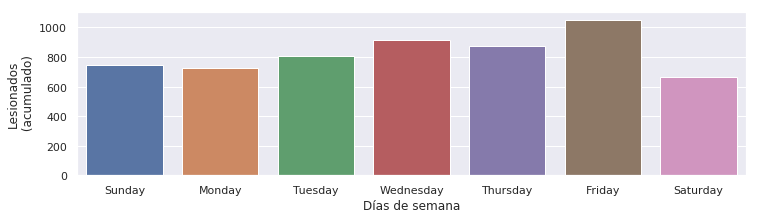

In [0]:
df5=df[['dia_semana', 'hora', 'lesionados']].groupby(['dia_semana', 'hora']).sum().sort_values('lesionados', ascending=False)
df5
sns.set(rc={'figure.figsize':(12,3)})
ax = sns.countplot(df['dia_semana'], label = "Count") 
plt.ylabel('Lesionados\n (acumulado)')
plt.xlabel('Días de semana');



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f19e171ecc0>],
      dtype=object)

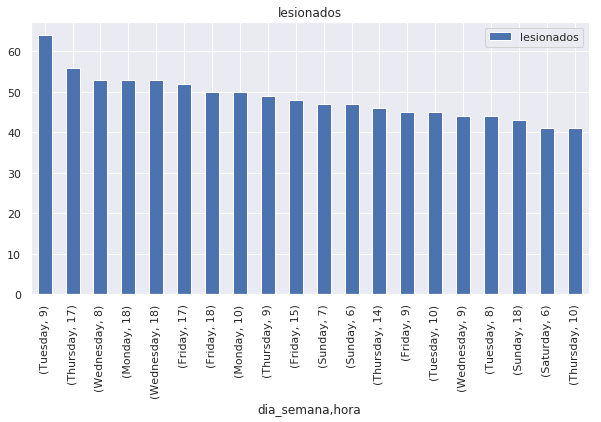

In [0]:
fig, ax = plt.subplots(figsize=(10,5))
df5.sort_values('lesionados', ascending=False).head(20).plot(ax=ax, kind='bar', subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f19dee67048>],
      dtype=object)

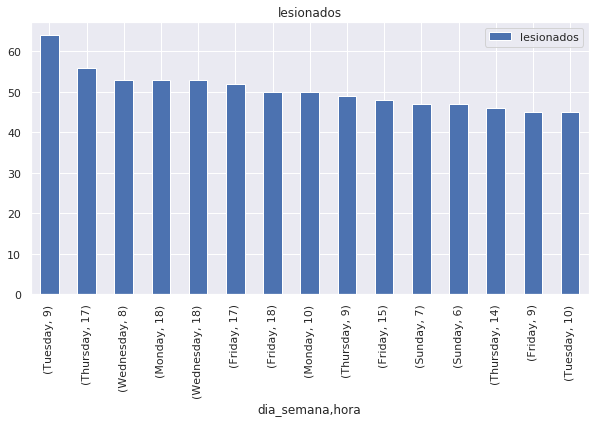

In [0]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set(rc={'figure.figsize':(10,5)})
#sns.barplot(x='dia_semana')
df5.sort_values('lesionados', ascending=False).head(15).plot(ax=ax, kind='bar', subplots=True)

In [0]:
# Transformamos la columna de cantidad de lesionados a si hubo lesionados (1) o no (0)
df.fallecidos = df.fallecidos.map(lambda x : 1 if x > 0 else 0)
df.lesionados = df.lesionados.map(lambda x : 1 if x > 0 else 0)
df.sample(5)

,periodo,fecha_hora,dia_semana,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion,fecha
5513,201812,2018-12-31 05:00:00,Monday,5,AU PERITO MORENO,ASCENDENTE,5400,BUENO,SECA,0,0,SINIESTRO DE UN SOLO VEHICULO / SIN COLISION,1,0,0,0,2018-12-31
967,201411,2014-11-17 16:00:00,Monday,16,AU 25 DE MAYO,ASCENDENTE,5800,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,1,0,0,2014-11-17
1025,201412,2014-12-01 19:00:00,Monday,19,AU 25 DE MAYO,DESCENDENTE,8500,BUENO,SECA,1,0,COLISION CON DOS O MAS VEHICULOS,1,1,0,0,2014-01-12
4852,201804,2018-04-22 22:00:00,Sunday,22,AU CAMPORA,ASCENDENTE,500,LLUVIOSO,MOJADA/HUMEDA,1,0,COLISION CON OBSTACULO FIJO,0,0,0,1,2018-04-22
4109,201708,2017-08-18 18:00:00,Friday,18,AU FRONDIZI,DESCENDENTE,1800,BUENO,SECA,1,0,SINIESTRO DE UN SOLO VEHICULO / SIN COLISION,1,0,0,0,2017-08-18


/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


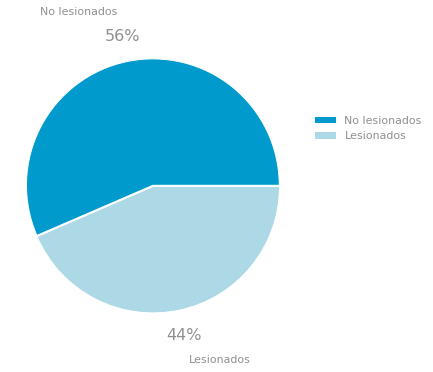

In [0]:
# Vemos los lesionados
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
lesionados = [df.loc[df['lesionados'] == 0].count()['lesionados'], df.loc[df['lesionados'] > 0].sum()['lesionados']]

fig, ax = plt.subplots(figsize=(5,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=16
labels = ['No lesionados', 
        'Lesionados']
explode=(0.01,0)
ax.pie(lesionados, explode=explode, labels=labels,  
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
#ax.set_title("Lesionados en 5785 accidentes")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

[]

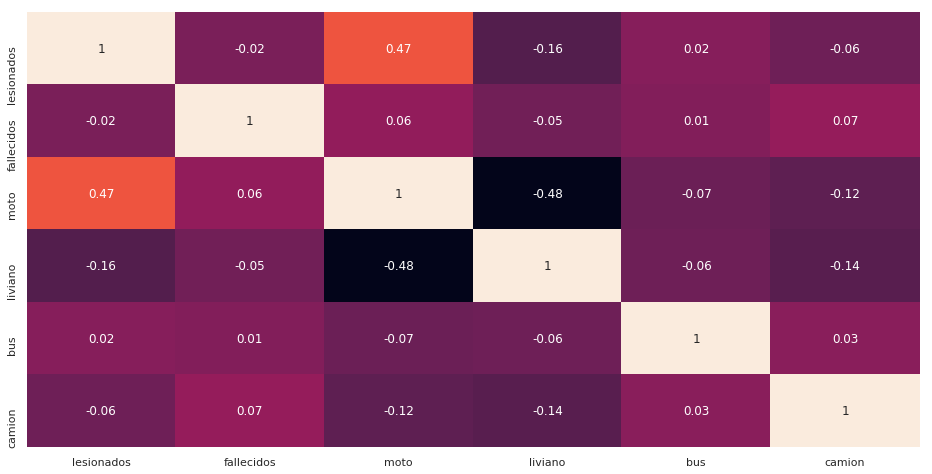

In [0]:
# Relación entre features pre dummies
sns.set(rc={'figure.figsize':(16,8)})
# Usamos todas las features para un heatmap
sns_hm=sns.heatmap(df.corr().round(2),annot=True, cbar=False)
sns_hm.plot()
# fig.savefig("features_heatmap.png".format(), dpi=400)

###Corregimos algunas textos duplicados dentro de las columnas
####y procesamos textos para poder operar con dummies

In [0]:
print(len(df.autopista.unique()),df.autopista.unique())
print(len(df.banda_y_o_ramal.unique()),df.banda_y_o_ramal.unique())
print(len(df.condiciones_meteorologicas.unique()),df.condiciones_meteorologicas.unique())
print(len(df.superficie_de_la_via.unique()),df.superficie_de_la_via.unique())
print(len(df.tipo_de_siniestro.unique()),df.tipo_de_siniestro.unique())


17 ['AU CAMPORA' 'AU DELLEPIANE' 'AU 25 DE MAYO' 'AU PERTIO MORENO'
 'AV LUGONES' 'AV CANTILO' 'AU FRONDIZI' 'AU ILLIA' 'AV. LUGONES'
 'AU PERITO MORENO' 'DIST. 9 DE JULIO' 'AV. CANTILO' 'TRANSICION RAMAL 2'
 'DIST. UDAONDO' 'TRANSICION RAMAL 3' 'PTE. SCALABRINI ORTIZ'
 'TRANSICION RAMAL 1']
25 ['ASCENDENTE' 'DESCENDENTE' 'TRANSICION RAMAL 2' 'TRANSICION RAMAL 4'
 'TRANSICION RAMAL 3' 'DISTRIBUIDOR 9 DE JULIO' 'PUENTE SCALABRINI ORTIZ'
 'DISTRIBUIDOR UDAONDO' 'TRANSICION RAMAL 1' 'DISTRIBUIDOR DELLEPIANE'
 'CARRIL METROBUS' 'PUENTE ANGEL LABRUNA' 'RAMAL 1 BIS' 'RAMAL 2 BIS'
 'RAMAL 6' 'RAMAL DE ENLACE' ' ' 'RAMAL 4' 'RAMAL DE ENLACE (AU1/AU6)'
 'RAMAL 3/4' 'RAMAL 8' 'RAMAL DE EGRESO' 'RAMAL 1' 'RAMAL 3'
 'PTE. LABRUBNA']
5 ['BUENO' 'LLUVIOSO' 'VIENTOS FUERTES' 'NIEBLA, BRUMA O HUMO' 'NIEBLA']
4 ['SECA' 'MOJADA/HUMEDA' 'OTRO' 'INUNDADA']
7 ['COLISION CON OBSTACULO FIJO' 'COLISION CON DOS O MAS VEHICULOS'
 'OBSTACULO NO FIJO' 'SINIESTRO DE UN SOLO VEHICULO / SIN COLISION'
 'OTRO TIPO DE 

#### Debemos hacer un seguimiento para las variables dummies

In [0]:

# En esta lista estan las categorías por las que más adelante se generan las dummies segun el indice
df.autopista = df.autopista.apply(lambda x: x.replace('PERTIO','PERITO').replace('.', '').replace(' ', '_').replace("'", '').replace('/', '_'))
df.banda_y_o_ramal = df.banda_y_o_ramal.apply(lambda x: x.replace('PTE. LABRUBNA','PUENTE ANGEL LABRUNA').replace('.', '').replace(' ', '_').replace("'", '').replace('/', '_'))
df.condiciones_meteorologicas = df.condiciones_meteorologicas.apply(lambda x: x.replace('.', '').replace(',', '').replace(' ', '_').replace("'", '').replace('/', '_'))
df.superficie_de_la_via = df.superficie_de_la_via.apply(lambda x: x.replace('.', '').replace(' ', '_').replace("'", '').replace('/', '_'))
df.tipo_de_siniestro = df.tipo_de_siniestro.apply(lambda x: x.replace('.', '').replace(' ', '_').replace("'", '').replace('/', '_'))


In [0]:
print(len(df.autopista.unique()),df.autopista.unique())
print(len(df.banda_y_o_ramal.unique()),df.banda_y_o_ramal.unique())
print(len(df.condiciones_meteorologicas.unique()),df.condiciones_meteorologicas.unique())
print(len(df.superficie_de_la_via.unique()),df.superficie_de_la_via.unique())
print(len(df.tipo_de_siniestro.unique()),df.tipo_de_siniestro.unique())


14 ['AU_CAMPORA' 'AU_DELLEPIANE' 'AU_25_DE_MAYO' 'AU_PERITO_MORENO'
 'AV_LUGONES' 'AV_CANTILO' 'AU_FRONDIZI' 'AU_ILLIA' 'DIST_9_DE_JULIO'
 'TRANSICION_RAMAL_2' 'DIST_UDAONDO' 'TRANSICION_RAMAL_3'
 'PTE_SCALABRINI_ORTIZ' 'TRANSICION_RAMAL_1']
24 ['ASCENDENTE' 'DESCENDENTE' 'TRANSICION_RAMAL_2' 'TRANSICION_RAMAL_4'
 'TRANSICION_RAMAL_3' 'DISTRIBUIDOR_9_DE_JULIO' 'PUENTE_SCALABRINI_ORTIZ'
 'DISTRIBUIDOR_UDAONDO' 'TRANSICION_RAMAL_1' 'DISTRIBUIDOR_DELLEPIANE'
 'CARRIL_METROBUS' 'PUENTE_ANGEL_LABRUNA' 'RAMAL_1_BIS' 'RAMAL_2_BIS'
 'RAMAL_6' 'RAMAL_DE_ENLACE' '_' 'RAMAL_4' 'RAMAL_DE_ENLACE_(AU1_AU6)'
 'RAMAL_3_4' 'RAMAL_8' 'RAMAL_DE_EGRESO' 'RAMAL_1' 'RAMAL_3']
5 ['BUENO' 'LLUVIOSO' 'VIENTOS_FUERTES' 'NIEBLA_BRUMA_O_HUMO' 'NIEBLA']
4 ['SECA' 'MOJADA_HUMEDA' 'OTRO' 'INUNDADA']
7 ['COLISION_CON_OBSTACULO_FIJO' 'COLISION_CON_DOS_O_MAS_VEHICULOS'
 'OBSTACULO_NO_FIJO' 'SINIESTRO_DE_UN_SOLO_VEHICULO___SIN_COLISION'
 'OTRO_TIPO_DE_SINIESTRO' 'OTRO' 'CON_DOS_O_MAS_VEHICULOS-IMPACTO_TRASERO']


In [0]:
# Generamos los dummies para 'explicación'
df_dummies = pd.get_dummies(df, columns = ['fecha', 'dia_semana', 'autopista', 'banda_y_o_ramal', 'condiciones_meteorologicas','superficie_de_la_via','tipo_de_siniestro', 'periodo', 'fecha_hora', 'hora', 'pk'], drop_first = True)
df_dummies.columns

Index(['lesionados', 'fallecidos', 'moto', 'liviano', 'bus', 'camion',
       'fecha_2014-01-02', 'fecha_2014-01-04', 'fecha_2014-01-05',
       'fecha_2014-01-06',
       ...
       'pk_RAMPA ACCESO FINOCHIETTO', 'pk_RAMPA ACCESO P. COLON',
       'pk_RAMPA EGRESO', 'pk_RAMPA EGRESO LIBERTADOR',
       'pk_RAMPA SALIDA AV. CASEROS', 'pk_RAMPA SALIDA AV. HUERGO',
       'pk_RAMPA SALIDA AV. HUERGO / LIVIANOS',
       'pk_RAMPA SALIDA AV. M. DE OCA', 'pk_RAMPA SALIDA HUERGO LIVIANOS',
       'pk_RAMPA SALIDA HUERGO PESADOS'],
      dtype='object', length=7356)

In [0]:
# Generamos los dummies para 'predicción'
#df_dummies = pd.get_dummies(df, 
#                            columns = ['dia_semana', 'hora', 'autopista', 'banda_y_o_ramal', 'pk',
#                                       'condiciones_meteorologicas', 'superficie_de_la_via',
#                                       'tipo_de_siniestro'], drop_first = True)
#df_dummies.columns

In [0]:
# Reemplazamos
df = df_dummies
#df.columns
print(df.shape)
display(df.head())

(5785, 7356)


,lesionados,fallecidos,moto,liviano,bus,camion,fecha_2014-01-02,fecha_2014-01-04,fecha_2014-01-05,fecha_2014-01-06,fecha_2014-01-07,fecha_2014-01-08,fecha_2014-01-09,fecha_2014-01-10,fecha_2014-01-11,fecha_2014-01-12,fecha_2014-01-14,fecha_2014-01-15,fecha_2014-01-16,fecha_2014-01-17,fecha_2014-01-18,fecha_2014-01-19,fecha_2014-01-20,fecha_2014-01-21,fecha_2014-01-23,fecha_2014-01-24,fecha_2014-01-25,fecha_2014-01-26,fecha_2014-01-27,fecha_2014-01-28,fecha_2014-01-29,fecha_2014-01-30,fecha_2014-01-31,fecha_2014-02-02,fecha_2014-02-04,fecha_2014-02-06,fecha_2014-02-07,fecha_2014-02-08,fecha_2014-02-09,fecha_2014-02-10,...,pk_9300,pk_9400,pk_9500,pk_9550,pk_9600,pk_9700,pk_9800,pk_9900,pk_D9J-R2/R2BIS,pk_D9J-R2BIS,pk_D9J-R4,pk_DDEL-R14,pk_PTE. ANGEL LABRUNA,pk_PUENTE A. LABRUNA,pk_PUENTE S. ORTIZ,pk_RAMAL 1,pk_RAMAL 12,pk_RAMAL 1BIS,pk_RAMAL 2,pk_RAMAL 2/1,pk_RAMAL 2/2BIS,pk_RAMAL 2BIS,pk_RAMAL 3,pk_RAMAL 4,pk_RAMAL 5,pk_RAMAL 6,pk_RAMAL 7,pk_RAMAL 8,pk_RAMAL ENLACE,pk_RAMPA ACCESO,pk_RAMPA ACCESO FINOCHIETTO,pk_RAMPA ACCESO P. COLON,pk_RAMPA EGRESO,pk_RAMPA EGRESO LIBERTADOR,pk_RAMPA SALIDA AV. CASEROS,pk_RAMPA SALIDA AV. HUERGO,pk_RAMPA SALIDA AV. HUERGO / LIVIANOS,pk_RAMPA SALIDA AV. M. DE OCA,pk_RAMPA SALIDA HUERGO LIVIANOS,pk_RAMPA SALIDA HUERGO PESADOS
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###Guardamos el dataset transformado

In [0]:
import pickle

In [0]:
with open('{}intervenciones-de-seguridad-vial_dummies_expl.pkl'.format(path), 'wb') as df_pkl:
    pickle.dump(df, df_pkl)

In [0]:
# Armo matriz de features y el target
X = df.drop(['lesionados', 'fallecidos'], axis = 1)
y = df['lesionados']

In [0]:
# features_a_encodear = ['periodo', 'dia_semana', 'hora', 'autopista', \
#                       'banda_y_o_ramal', 'pk','condiciones_meteorologicas', \
#                       'superficie_de_la_via', 'tipo_de_siniestro']

In [0]:
# Paso columnas categóricas
#from sklearn.preprocessing import OneHotEncoder
#OHE = OneHotEncoder()
#X = OHE.fit_transform(X[features_a_encodear])
#X.shape

In [0]:
# Divido los datos en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(3875, 7354)
(1910, 7354)
(3875,)
(1910,)


In [0]:
!pip install xgboost
!pip install scikit-plot
# XGBoost
import scipy.stats as st
from sklearn.model_selection import RandomizedSearchCV
import time
from sklearn.metrics import roc_auc_score
from xgboost.sklearn import XGBClassifier
from scikitplot.metrics import plot_roc

In [0]:
model = XGBClassifier(nthreads=-1)
one_to_left = st.beta(10, 1) # Esta distribución nos dará valores entre 0 y 1 mayormente cercanos a 1
params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}
xgb = RandomizedSearchCV(model,params, n_iter=25, verbose= True)
start = time.time()
xgb.fit(X_train,y_train)
end = time.time()
print("La búsqueda con XGBoost llevó: ", end - start, " segundos")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 32.3min finished


La búsqueda con XGBoost llevó:  1979.9605584144592  segundos


In [0]:
opt_xgb = xgb.best_estimator_
type(opt_xgb)

xgboost.sklearn.XGBClassifier

In [0]:
y_predicted_xgb = opt_xgb.predict_proba(X_test)
y_predict = opt_xgb.predict(X_test)
y_predicted_xgb[:,0].shape

(1910,)

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79      1084
           1       0.75      0.59      0.66       826

    accuracy                           0.74      1910
   macro avg       0.74      0.72      0.72      1910
weighted avg       0.74      0.74      0.73      1910



In [0]:
xgb_auc = roc_auc_score(y_test,y_predict)
print("El valor del AUC es: ", xgb_auc)

El valor del AUC es:  0.7213106332031843


0.7392670157068063


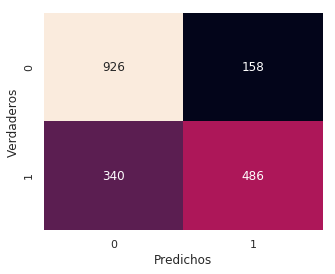

In [0]:
# Matriz de confusión

sns.set(rc={'figure.figsize':(5,4)})
sns.heatmap(confusion_matrix(y_test, y_predict), fmt="d", annot=True, cbar=False)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');
print(accuracy_score(y_test, y_predict))


In [0]:
confusion = confusion_matrix(y_test, y_predict)
print(confusion)

[[926 158]
 [340 486]]


XGBoost (área = 0.72)


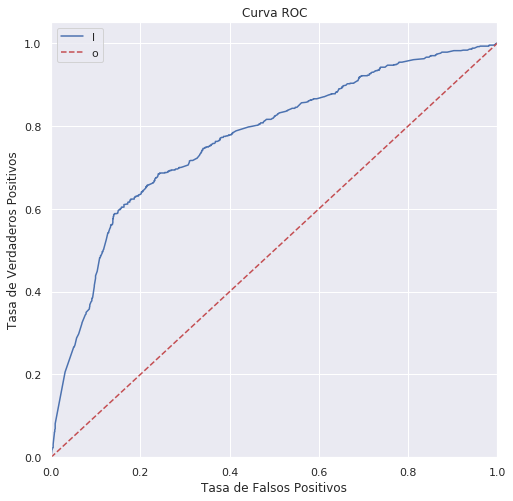

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#plot_roc(y_test,y_predict, plot_micro = False, plot_macro= False)

logit_roc_auc = roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, opt_xgb.predict_proba(X_test)[:,1])

print('XGBoost (área = %0.2f)' % logit_roc_auc)
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='XGBoost (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend("lower right")
plt.savefig('Log_ROC')
plt.show()



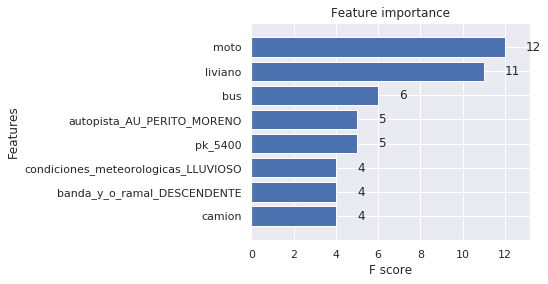

In [0]:
from xgboost import plot_importance
plot_importance(opt_xgb,  height = 0.8,max_num_features=8)

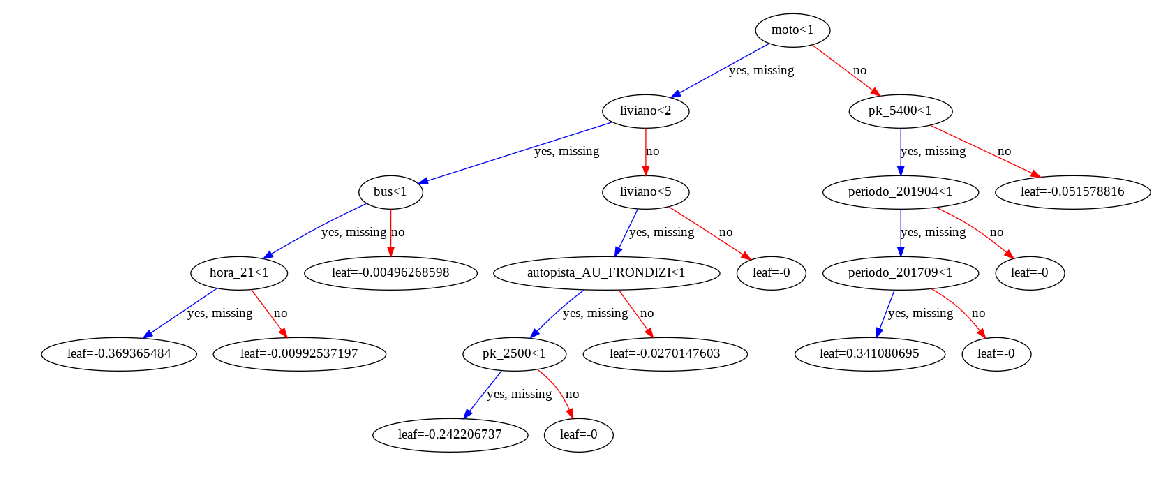

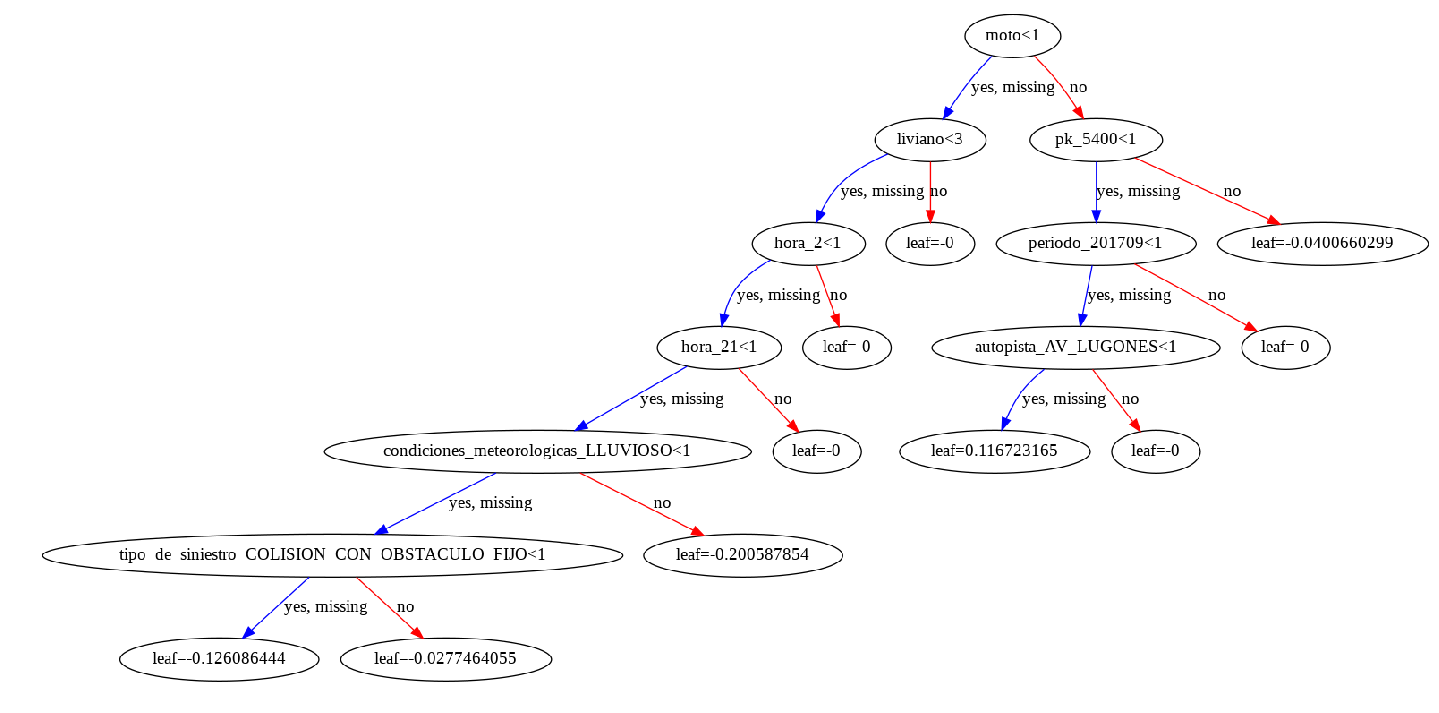

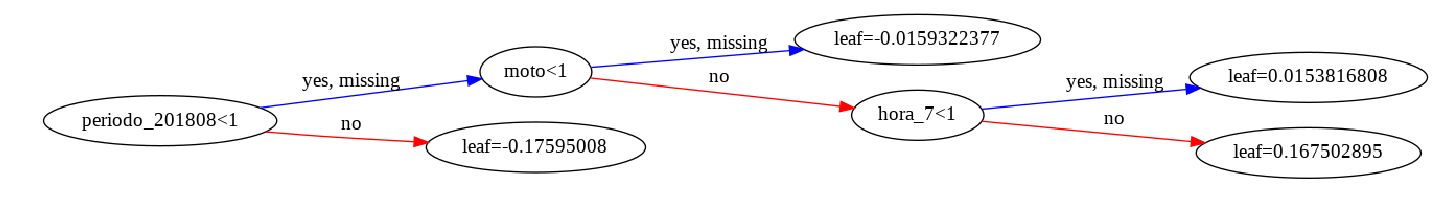

In [0]:
# https://graphviz.gitlab.io/_pages/Download/Download_windows.html
# https://stackoverflow.com/questions/48736428/windows-10-anaconda-graphviz-error-not-working
from xgboost import plot_tree
import matplotlib.pyplot as plt
import xgboost as xgboost

fig, ax = plt.subplots(figsize=(20,20))
#plt.figure(figsize=(18,10))

# Plot the first tree
xgboost.plot_tree(opt_xgb,num_trees=0, ax=ax)
plt.show()
# Plot the fifth tree
fig, ax1 = plt.subplots(figsize=(25,25))
xgboost.plot_tree(opt_xgb,num_trees=4,ax=ax1)
plt.show()
# Plot the last tree sideways
fig, ax2 = plt.subplots(figsize=(25,25))
xgboost.plot_tree(opt_xgb,num_trees=9, rankdir='LR',ax=ax2)
plt.show()